In [23]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

#import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
import re
%matplotlib inline
from CleaningClass import dfCleaning

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
## Set-ups to Connect to MongoDB

config = configparser.ConfigParser()
config.read('config.ini')

mongod_connect = config['mymongo']['connection']

client = MongoClient(mongod_connect)

db = client.test

## Get the data

### SouthEast Asia

In [3]:
HKCollection = db.newHongKong

In [5]:
HKdata = pd.DataFrame(list(HKCollection.find()))

In [6]:
HKdata.columns

Index(['_id', 'created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'lang', 'extended_entities'],
      dtype='object')

### Europe

In [7]:
EUCollection = db.newEU

In [8]:
EUdata = pd.DataFrame(list(EUCollection.find()))

In [9]:
len(EUdata.columns)

30

## Data Cleaning

#### EU cleaned

In [10]:
EUtweets = EUdata[['text','retweet_count','favorite_count']]

In [13]:
EUCleaned = dfCleaning(EUtweets)

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
EUCleaned.head(6)

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,Nothing to do w/current subject but my pet hat...,0,0,"noth w/current subject pet hate, 1 many, ppl i...",No hashtags
1,@raumsonde543 @CNN https://t.co/hdz1xrANAw\nht...,0,0,,No hashtags
2,"@Brehbander Nee, dat valt best mee. Want juist...",0,1,"nee, dat valt best mee. want juist die casusse...",No hashtags
3,@hqt__ @hack___man @blackvoices It is sensatio...,0,0,it sensat sinc deni everi day. white hate crim...,No hashtags
4,@DannyHackett @bexleynews Hate is a crime now.,0,0,hate crime now.,No hashtags
5,@aisssssse ce fut un hate crime ducoup 😢😢 mais...,0,1,ce fut un hate crime ducoup mai au moin notr r...,No hashtags


#EU Tokenization
EUcorpus = []
for i in range(0,EUCleaned.shape[0]):
    tweet = EUCleaned['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    EUcorpus.append(tweet)

EUcorpus

#### HK cleaned

In [18]:
HKtweets = HKdata[['text','retweet_count','favorite_count']]

In [34]:
HKCleaned = dfCleaning(HKtweets)

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
HKCleaned.head(6)

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,Whole muslim world follow these protocols exce...,0,1,whole muslim world follow protocol except unfo...,No hashtags
1,American actor Jussie Smollett guilty of false...,0,0,american actor jussi smollett guilti fals hate...,No hashtags
2,Jussie Smollett Found Guilty Of Staging Fake H...,0,0,jussi smollett found guilti of stage fake hate...,No hashtags
3,Jussie Smollett Found Guilty Of Staging Fake H...,0,0,jussi smollett found guilti of stage fake hate...,No hashtags
4,US actor found guilty in staged racist hate cr...,1,3,us actor found guilti stage racist hate crime ...,No hashtags
5,Actor Jussie Smollett found guilty of staging ...,5,11,actor jussi smollett found guilti stage fake h...,No hashtags


In [36]:
#HK Tokenization
HKcorpus = []
for i in range(0,HKCleaned.shape[0]):
    tweet = HKCleaned['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    HKcorpus.append(tweet)

NameError: name 'ps' is not defined

In [37]:
HKcorpus

[]

## Word clouds

In [38]:

    
def my_tf_color_func(dictionary):
  def my_tf_color_func_inner(word, **kwargs):
    return "hsl(%d, 80%%, 50%%)" % (360 * dictionary[word])
  return my_tf_color_func_inner

Normal words


(-0.5, 799.5, 499.5, -0.5)

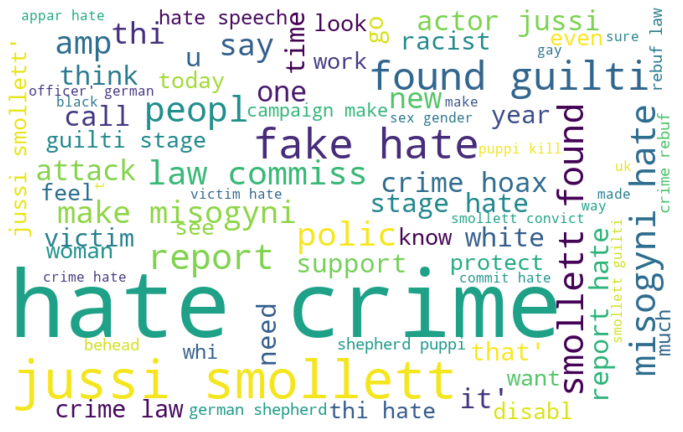

In [39]:
normal_words = ' '.join([word for word in EUCleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

## Vader sentiment analysis package

In [40]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
sia = SentimentIntensityAnalyzer()

### Adding Scores and Labels to the DataFrame
#### The SentimentIntensityAnalyzer() will return a dictionaries with compound scores and negtive/neutrual/positive labels

In [42]:
HKCleaned['scores'] = HKCleaned['clean_tweet'].apply(lambda text: sia.polarity_scores(text))

In [43]:
HKCleaned.head(3)

,text,retweet_count,favorite_count,clean_tweet,Hash words,scores
0,Whole muslim world follow these protocols exce...,0,1,whole muslim world follow protocol except unfo...,No hashtags,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,American actor Jussie Smollett guilty of false...,0,0,american actor jussi smollett guilti fals hate...,No hashtags,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp..."
2,Jussie Smollett Found Guilty Of Staging Fake H...,0,0,jussi smollett found guilti of stage fake hate...,No hashtags,"{'neg': 0.42, 'neu': 0.437, 'pos': 0.143, 'com..."


#### separate compound to it's own column. Tweets that have compound scores greater than zeroes will be considered a 'positive' tweets. 'negative' if compound scores lower than zero

In [44]:
HKCleaned['compound'] = HKCleaned['scores'].apply(lambda score_dict: score_dict['compound'])

In [45]:
HKCleaned['comp_score'] = HKCleaned['compound'].apply(lambda c: 'pos' if c >0.1 else ('neg' if c < -0.1 else 'nutral'))

In [61]:
pd.options.display.max_colwidth = 200

In [63]:
HKCleaned.sort_values(['favorite_count', 'compound'],ascending = False)

,text,retweet_count,favorite_count,clean_tweet,Hash words,scores,compound,comp_score
338,@ImranKhanPTI Don't make fool of others\n\nIt was not a vigilante attack\n\nIt was a crime covered with hate for non Muslims\n@MFA_SriLanka,255,2325,don't make fool other it vigilant attack it crime cover hate non muslim,No hashtags,"{'neg': 0.46, 'neu': 0.357, 'pos': 0.183, 'compound': -0.8017}",-0.8017,neg
208,wakui took down doratake maitake and fuyutake in one arc damn this is a hate crime,428,1709,wakui took doratak maitak fuyutak one arc damn hate crime,No hashtags,"{'neg': 0.586, 'neu': 0.414, 'pos': 0.0, 'compound': -0.872}",-0.8720,neg
351,@SimuLiu Why weren't we told this before this is a hate crime https://t.co/xGKCtoVt8E,1,613,whi told hate crime,No hashtags,"{'neg': 0.783, 'neu': 0.217, 'pos': 0.0, 'compound': -0.802}",-0.8020,neg
334,"A truly heinous crime, and a day of great sorrow. I trust the perpetrators will be brought to justice; and I hope t… https://t.co/mhKEYMfB92",98,581,"a truli heinou crime, day great sorrow. i trust perpetr brought justice; i hope t...",No hashtags,"{'neg': 0.259, 'neu': 0.226, 'pos': 0.515, 'compound': 0.7783}",0.7783,pos
342,"Woman Devastated After Losing Husband And Kin To Brutal Hate Crime, Gets Help From Sewa Nyaya Utthan Foundation\nhttps://t.co/KAGlHTcTfB",116,283,"woman devast after lose husband and kin to brutal hate crime, get help from sewa nyaya utthan foundat",No hashtags,"{'neg': 0.471, 'neu': 0.438, 'pos': 0.091, 'compound': -0.9062}",-0.9062,neg
...,...,...,...,...,...,...,...,...
304,@LimaBuckeye07 @GreednEnvy @ajplus Sigh.\nBullying CAN include hate crimes but not all bullying is a hate crime. Thi… https://t.co/9dzOqgqdYy,0,0,sigh. bulli can includ hate crime bulli hate crime. thi...,No hashtags,"{'neg': 0.702, 'neu': 0.244, 'pos': 0.054, 'compound': -0.936}",-0.9360,neg
251,@ProdigyDDK But if they do get targeted and beaten then thats a hate crime for the police. Extremism doesnt belong anywhere.,0,0,but get target beaten that hate crime police. extrem doesnt belong anywhere.,No hashtags,"{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.9382}",-0.9382,neg
22,I just don’t get why would want to fake a hate crime when there’s so much hate already out in the fucking world like ?????,0,0,i get would want fake hate crime there' much hate alreadi fuck world like ?????,No hashtags,"{'neg': 0.631, 'neu': 0.239, 'pos': 0.13, 'compound': -0.949}",-0.9490,neg
64,"Disgraced actor Jussie Smollett, 39,\nhas been found guilty of:\n• faking hate crime attack;\n• staging a racist and h… https://t.co/75uyIgvntC",0,0,"disgrac actor jussi smollett, 39, found guilti of: * fake hate crime attack; * stage racist h...",No hashtags,"{'neg': 0.635, 'neu': 0.365, 'pos': 0.0, 'compound': -0.9545}",-0.9545,neg


## EDA

In [50]:
import seaborn as sns

[Text(0.5, 0, 'EU Result')]

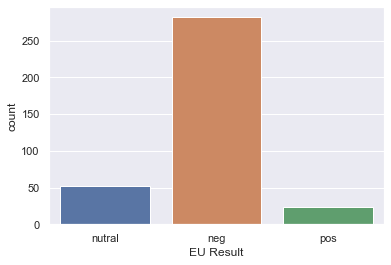

In [56]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(data=HKCleaned, x = 'comp_score')
ax.set(xlabel='EU Result')

Normal words


(-0.5, 799.5, 499.5, -0.5)

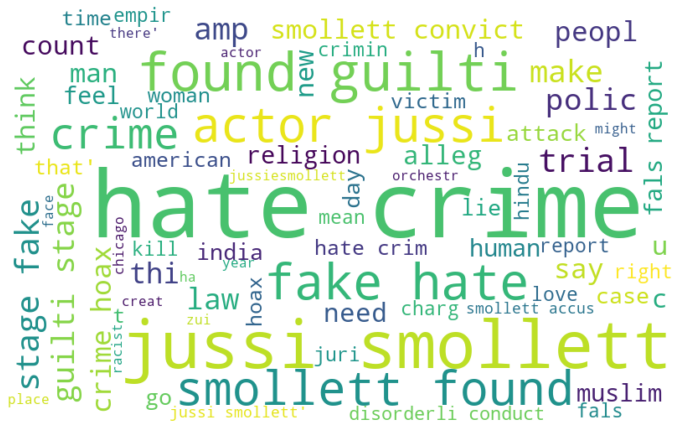

In [27]:
normal_words = ' '.join([word for word in HKCleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')